In [4]:
%load_ext tensorboard
%tensorboard --logdir "D:\Projekty\woundprocessing\modal_simulation\logs\\train10_val1\\training"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [1]:
import torch
from modal_simulation.src.generator import Generator
from modal_simulation.src.data import Loader, CustomDataset
from modal_simulation.src.inference import visualize_image
from pathlib import Path

model_name = 'train10_val10'
loader = Loader('D:\\Projekty\\woundprocessing\\data\\')
inference_dir = f'D:\\Projekty\\woundprocessing\\modal_simulation\\visualizations\\tests\\{model_name}\\'
Path(f'D:\\Projekty\\woundprocessing\\modal_simulation\\visualizations\\tests\\{model_name}').mkdir(parents=True, exist_ok=True)
model = Generator().cuda()
model.load_state_dict(torch.load(f'D:\\Projekty\\woundprocessing\\modal_simulation\\models\\{model_name}\\generator.pth', weights_only=True))

test_rgb_images, test_ir_images = loader.load(folds=10)
test_dataset = CustomDataset(test_rgb_images, test_ir_images, transform=None)

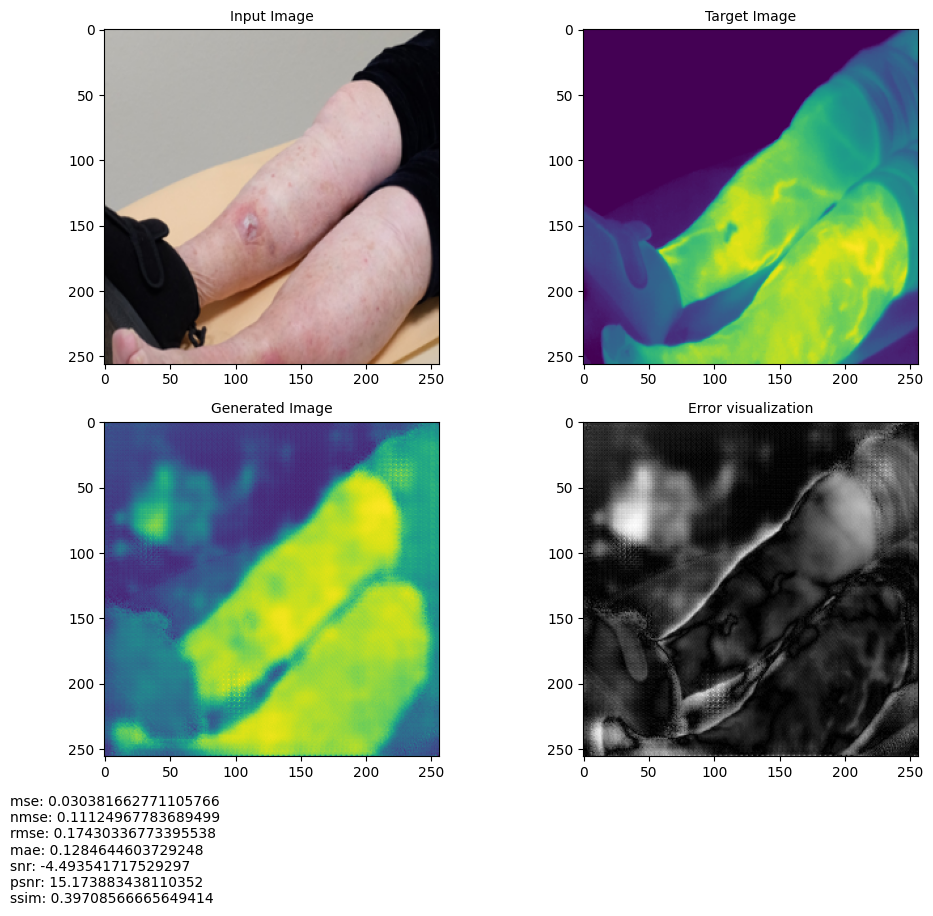

In [10]:
visualize_image(model.cuda(), test_dataset, image=6, metrics=True)